In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [146]:
file_path = 'Local Products Exportation Morocco.csv'
data = pd.read_csv(file_path, delimiter=',')

data

,Period,Agricultural products,Cotton,Leather,Processed food and agro-based products,Total
0,2000-Q1,332441.0,169.0,58295.0,304941.0,695846.0
1,2000-Q2,224801.0,244.0,55548.0,200588.0,481181.0
2,2000-Q3,127046.0,23.0,63902.0,216606.0,407577.0
3,2000-Q4,232257.0,0.0,58893.0,277342.0,568492.0
4,2001-Q1,301359.0,72.0,65345.0,240431.0,607207.0
...,...,...,...,...,...,...
89,2022-Q2,1935508.0,32.0,99684.0,1011092.0,3046316.0
90,2022-Q3,1011122.0,25.0,108998.0,851474.0,1971619.0
91,2022-Q4,1644487.0,85.0,112392.0,829201.0,2586165.0
92,2023-Q1,2037322.0,467.0,112812.0,1050748.0,3201349.0


In [147]:
def last_day_month(month):
    if month == 6 or month == 9:
        return 30
    else:
        return 31

def convert_quarter_to_date(quarter):
    year, q = quarter.split('-Q')
    month = (int(q) - 1) * 3 + 3
    day = last_day_month(month)
    return pd.Timestamp(f"{year}-{month:02d}-{day:02d}")

data['Period'] = data['Period'].apply(convert_quarter_to_date)

data.head()

,Period,Agricultural products,Cotton,Leather,Processed food and agro-based products,Total
0,2000-03-31,332441.0,169.0,58295.0,304941.0,695846.0
1,2000-06-30,224801.0,244.0,55548.0,200588.0,481181.0
2,2000-09-30,127046.0,23.0,63902.0,216606.0,407577.0
3,2000-12-31,232257.0,0.0,58893.0,277342.0,568492.0
4,2001-03-31,301359.0,72.0,65345.0,240431.0,607207.0


In [148]:
data['Period'] = pd.to_datetime(data['Period'])

data['year'] = data['Period'].dt.year
data['month'] = data['Period'].dt.month
data['day'] = data['Period'].dt.day

In [149]:
closedf = data[['Period','Total']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (94, 2)


In [150]:
closedf = closedf[closedf['Period'] > '1999-02-19']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  94


In [151]:
closedf

,Period,Total
0,2000-03-31,695846.0
1,2000-06-30,481181.0
2,2000-09-30,407577.0
3,2000-12-31,568492.0
4,2001-03-31,607207.0
...,...,...
89,2022-06-30,3046316.0
90,2022-09-30,1971619.0
91,2022-12-31,2586165.0
92,2023-03-31,3201349.0


In [152]:
del closedf['Period']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(94, 1)


In [153]:
training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (56, 1)
test_data:  (38, 1)


In [154]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [155]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (40, 15)
y_train:  (40,)
X_test:  (22, 15)
y_test (22,)


In [156]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (40, 15, 1)
X_test:  (22, 15, 1)


In [157]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [158]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
2/2 [==============================] - 3s 1s/step - loss: 0.0383 - val_loss: 0.2593
Epoch 2/200
2/2 [==============================] - 0s 86ms/step - loss: 0.0355 - val_loss: 0.2470
Epoch 3/200
2/2 [==============================] - 0s 78ms/step - loss: 0.0326 - val_loss: 0.2345
Epoch 4/200
2/2 [==============================] - 0s 69ms/step - loss: 0.0297 - val_loss: 0.2219
Epoch 5/200
2/2 [==============================] - 0s 71ms/step - loss: 0.0270 - val_loss: 0.2093
Epoch 6/200
2/2 [==============================] - 0s 76ms/step - loss: 0.0242 - val_loss: 0.1966
Epoch 7/200
2/2 [==============================] - 0s 40ms/step - loss: 0.0217 - val_loss: 0.1840
Epoch 8/200
2/2 [==============================] - 0s 38ms/step - loss: 0.0192 - val_loss: 0.1715
Epoch 9/200
2/2 [==============================] - 0s 38ms/step - loss: 0.0168 - val_loss: 0.1591
Epoch 10/200
2/2 [==============================] - 0s 38ms/step - loss: 0.0146 - val_loss: 0.1467
Epoch 11/200
2/2 [===

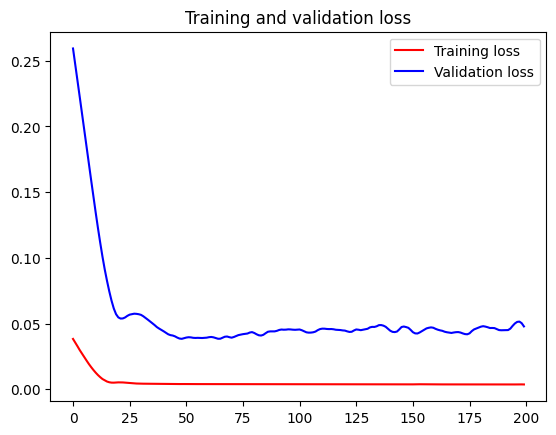

<Figure size 640x480 with 0 Axes>

In [159]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [160]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

1/1 [==============================] - 0s 22ms/step


((40, 1), (22, 1))

In [161]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [162]:
import math
from sklearn.metrics import mean_absolute_error
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  172969.77313762187
Train data MSE:  29918542419.280373
Train data MAE:  141335.8109375
-------------------------------------------------------------------------------------
Test data RMSE:  629762.8963772156
Test data MSE:  396601305653.4197
Test data MAE:  525626.7443181818


In [163]:
from sklearn.metrics import explained_variance_score

print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.5947846429817735
Test data explained variance regression score: 0.15109882415087283


In [164]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.5947713731039093
Test data R2 score: -0.6474534820260238


In [165]:
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import mean_poisson_deviance

print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.02518274089501734
Test data MGD:  0.08326264030901
----------------------------------------------------------------------
Train data MPD:  26921.818364144587
Test data MPD:  180126.53618457197


In [167]:
from itertools import cycle
import plotly.express as px

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Valeurs originales',"Valeurs prédites d'entrainement","Valeurs prédites de test"])

plotdf = pd.DataFrame({'Period': data['Period'],
                       'original_close': data['Total'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Period'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Total Value','date': 'Date'})
fig.update_layout(title_text='LSTM - Valeurs des produits du terroir marocain',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Terroir products values')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (94, 1)
Test predicted data:  (94, 1)


In [168]:
X_train

array([[[0.10007342],
        [0.02555184],
        [0.        ],
        [0.05586211],
        [0.06930214],
        [0.00255748],
        [0.03605009],
        [0.07264904],
        [0.11758139],
        [0.03030055],
        [0.0465289 ],
        [0.06346719],
        [0.11778378],
        [0.10810133],
        [0.05112417]],

       [[0.02555184],
        [0.        ],
        [0.05586211],
        [0.06930214],
        [0.00255748],
        [0.03605009],
        [0.07264904],
        [0.11758139],
        [0.03030055],
        [0.0465289 ],
        [0.06346719],
        [0.11778378],
        [0.10810133],
        [0.05112417],
        [0.11404181]],

       [[0.        ],
        [0.05586211],
        [0.06930214],
        [0.00255748],
        [0.03605009],
        [0.07264904],
        [0.11758139],
        [0.03030055],
        [0.0465289 ],
        [0.06346719],
        [0.11778378],
        [0.10810133],
        [0.05112417],
        [0.11404181],
        [0.15318018]],

    

In [169]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (40, 15)
y_train:  (40,)
X_test:  (22, 15)
y_test (22,)


In [170]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [171]:
from sklearn.linear_model import LinearRegression

train_predict=lr.predict(X_train)
test_predict=lr.predict(X_test)
train_predict.shape, test_predict.shape

((40,), (22,))

In [172]:
train_predict = train_predict.reshape(-1, 1)
test_predict = test_predict.reshape(-1, 1)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [173]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  75937.17544740357
Train data MSE:  5766454614.929751
Train data MAE:  61529.16357548669
-------------------------------------------------------------------------------------
Test data RMSE:  369235.077233991
Test data MSE:  136334542259.99132
Test data MAE:  300240.14703287004


In [174]:
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9218968473490623
Test data explained variance regression score: 0.7874495685747206


In [175]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9218968473490623
Test data R2 score: 0.43367605410022636


In [176]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.00519524335312731
Test data MGD:  0.02619536199802179
----------------------------------------------------------------------
Train data MPD:  5296.012816433353
Test data MPD:  58919.44794548051


In [178]:
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Valeurs originales',"Valeurs prédites d'entrainement","Valeurs prédites de test"])

plotdf = pd.DataFrame({'Period': data['Period'],
                       'original_close': data['Total'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Period'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Total Value','date': 'Date'})
fig.update_layout(title_text='Linear Regression - Valeurs des produits du terroir marocain',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Terroir products values')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (94, 1)
Test predicted data:  (94, 1)


In [179]:
import xgboost as xgb

xgb = xgb.XGBRegressor(objective='reg:squarederror')
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [180]:
train_predict=xgb.predict(X_train)
test_predict=xgb.predict(X_test)
train_predict.shape, test_predict.shape

((40,), (22,))

In [181]:
train_predict = train_predict.reshape(-1, 1)
test_predict = test_predict.reshape(-1, 1)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1402.8737864619973
Train data MSE:  1968054.8607422218
Train data MAE:  1018.7718749999971
-------------------------------------------------------------------------------------
Test data RMSE:  974710.884469107
Test data MSE:  950061308302.549
Test data MAE:  843317.2443181818


In [182]:
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9999733438829547
Test data explained variance regression score: 0.0077206261446578495


In [183]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9999733438829439
Test data R2 score: -2.946486782040523


In [184]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  2.234902315023657e-06
Test data MGD:  0.27263558651386605
----------------------------------------------------------------------
Train data MPD:  1.9518120369233656
Test data MPD:  502634.2719368706


In [185]:
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Valeurs originales',"Valeurs prédites d'entrainement","Valeurs prédites de test"])

plotdf = pd.DataFrame({'Period': data['Period'],
                       'original_close': data['Total'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Period'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Total Value','date': 'Date'})
fig.update_layout(title_text='XGBRegressor - Valeurs des produits du terroir marocain',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Terroir products values')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (94, 1)
Test predicted data:  (94, 1)


In [186]:
import joblib

# Save the model
joblib_file = "linear_regression_model.pkl"
joblib.dump(lr, joblib_file)

['linear_regression_model.pkl']